In [726]:
import os
import sys
import numpy as np
import time
import json
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from collections import defaultdict
from matplotlib.pyplot import axvline
import math
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from inspect import signature
from collections import Counter, defaultdict
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import pickle

In [7]:
with open("./feature_map.json", "r") as f:
    features = json.load(f)
id_2_feature = {y:x for x,y in features.items()}

##### With raw scores as input, itegrate out the measure scores in a user specific way.

In [17]:
def get_measure_scores(usrid, usr_type, input_path, output_path, lamda_0 = None):

    # get rid of the first element because, by default, it is set as 0 in DHP.

    if lamda_0:
        f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path, usrid, lamda_0))[1:]
        f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path, usrid, lamda_0))[1:]
        _sus_score = np.load("./%s/score/%s_score_%s.npy"%(input_path, usrid, lamda_0))[1:]
    else:
        f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path, usrid))[1:]
        f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path, usrid))[1:]
        _sus_score = np.load("./%s/score/%s_score.npy"%(input_path,usrid))[1:]

    if usr_type == "normal":
        _tim_act = np.load("./dataRepo/input/NormalData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/NormalData/label_sess_%s.npy"%usrid)[1:]
    else:
        _tim_act = np.load("./dataRepo/input/InsiderData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/InsiderData/label_sess_%s.npy"%usrid)[1:]

    _tim = _tim_act[:, 0].astype(float)
    _act = _tim_act[:, 1].astype(int)
    _label = _label_sess[:,0]
                                                    
    if lamda_0:
        np.save("./%s/f_t/%s_f_t_%s.npy"%(output_path, usrid, lamda_0), f_t)
        np.save("./%s/f_y/%s_f_y_%s.npy"%(output_path, usrid, lamda_0), f_y)
        np.save("./%s/score/%s_score_%s.npy"%(output_path, usrid, lamda_0), _sus_score)
    else:
        np.save("./%s/f_t/%s_f_t.npy"%(output_path, usrid), f_t)
        np.save("./%s/f_y/%s_f_y.npy"%(output_path, usrid), f_y)
        np.save("./%s/score/%s_score.npy"%(output_path, usrid),_sus_score)
        
    np.save("./%s/activity/%s_act.npy"%(output_path,usrid),_act)
    np.save("./%s/time/%s_time.npy"%(output_path, usrid),_tim)
    np.save("./%s/label/%s_act_label.npy"%(output_path, usrid),_label)

##### With raw scores as input, itegrate out the measure scores in a user-\lambda_0 specific way.

In [95]:
def get_measure_scores_2(usrid, usr_type, input_path, output_path, lamda_0 = None):

    # get rid of the first element because, by default, it is set as 0 in DHP.

    f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path, usrid, lamda_0))[1:]
    f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path, usrid, lamda_0))[1:]
    _sus_score = np.load("./%s/score/%s_score_%s.npy"%(input_path, usrid, lamda_0))[1:]

    if usr_type == "normal":
        _tim_act = np.load("./dataRepo/input/NormalData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/NormalData/label_sess_%s.npy"%usrid)[1:]
    else:
        _tim_act = np.load("./dataRepo/input/InsiderData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/InsiderData/label_sess_%s.npy"%usrid)[1:]

    _tim = _tim_act[:, 0].astype(float)
    _act = _tim_act[:, 1].astype(int)
    _label = _label_sess[:,0]
                                                    
    
    np.save("./%s/f_t/%s_f_t_%s.npy"%(output_path, usrid, lamda_0), f_t)
    np.save("./%s/f_y/%s_f_y_%s.npy"%(output_path, usrid, lamda_0), f_y)
    np.save("./%s/score/%s_score_%s.npy"%(output_path, usrid, lamda_0), _sus_score)
        
    np.save("./%s/activity/%s_act.npy"%(output_path,usrid),_act)
    np.save("./%s/time/%s_time.npy"%(output_path, usrid),_tim)
    np.save("./%s/label/%s_act_label.npy"%(output_path, usrid),_label)

### 1. Measure score preprocessing

In [644]:
input_path = "dmhpOutput"
output_path = "eval_input"

if not os.path.exists("./eval_input/f_t/"):
    os.makedirs("./eval_input/f_t/")

if not os.path.exists("./eval_input/f_y/"):
    os.makedirs("./eval_input/f_y/")
    
if not os.path.exists("./eval_input/score/"):
    os.makedirs("./eval_input/score/")

if not os.path.exists("./eval_input/activity/"):
    os.makedirs("./eval_input/activity/")

if not os.path.exists("./eval_input/time/"):
    os.makedirs("./eval_input/time/")
    
if not os.path.exists("./eval_input/label/"):
    os.makedirs("./eval_input/label/")

for usrid in ['ACM2278', "CDE1846", 'CMP2946', 'MBG3183', 'PLJ1771']:
    get_measure_scores(usrid, "abnormal", input_path, output_path)
    
for usrid in ['AAB0398', 'AAC0610', 'AAC0668', 'AAC3270','AAD2188']:
    get_measure_scores(usrid, "normal", input_path, output_path)
    

# for i in np.arange(5):
    
#     for usrid in ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771']:
#         get_measure_scores_2(usrid, "abnormal", input_path, output_path, lamda_0=i+1)
        
#     for usrid in ['AAB0398', 'AAC0610', 'AAC0668', 'AAC3270', 'AAD2188']:
#         get_measure_scores_2(usrid, "normal", input_path, output_path, lamda_0=i+1)

### 2. For Baselines

In [727]:
def decimalTo01(n, bit_num):
    embedding = np.zeros(bit_num)
    embedding[n-1] = 1
    return embedding.tolist()

In [557]:
training_samples = []
testing_samples = []
training_labels = []
testing_labels = []
_activities = []

for usrid in ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771', 'AAB0398','AAC0610','AAC0668','AAC3270','AAD2188']:

    times = np.load("./eval_input/time/%s_time.npy"%usrid)
    activities = np.load("./eval_input/activity/%s_act.npy"%usrid)
    labels = np.load("./eval_input/label/%s_act_label.npy"%usrid)
    
    _thrld_time = times[int(len(times)/10)]
    _thrld_time = time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(_thrld_time))
    _thrld_time = datetime.datetime.strptime(_thrld_time,"%Y-%m-%d %H:%M:%S")
    
    count = 0
    count1 = 0
    for _time, _act, _label in zip(times, activities, labels):
        
        _activities.append(_act)    
        _time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(_time))
        _time = datetime.datetime.strptime(_time, "%Y-%m-%d %H:%M:%S")
        
        if _time < _thrld_time:
            training_samples.append(decimalTo01(_time.hour, 24) + decimalTo01(_act, 22))
            training_labels.append(_label)
            count += 1
        else:
            testing_samples.append(decimalTo01(_time.hour, 24) + decimalTo01(_act, 22))
            testing_labels.append(_label)
            count1 += 1
    print(usrid, ": ", _thrld_time, " ", count, count1)
    input()

In [557]:
training_samples = np.array(training_samples)
training_labels = np.array(training_labels)
testing_samples = np.array(testing_samples)
testing_labels = np.array(testing_labels)
_activities = np.array(_activities)

In [557]:
baseline_eval_input = "./baselines/"
if not os.path.exists(baseline_eval_input):
    os.makedirs(baseline_eval_input)
    
np.save("./baselines/training_samples", training_samples)
np.save("./baselines/training_labels", training_labels)
np.save("./baselines/testing_samples", testing_samples)
np.save("./baselines/testing_labels", testing_labels)
np.save("./baselines/activities", _activities)

##### 1. Isolation forest

In [728]:
clf_isolationforest = IsolationForest()

In [ ]:
training_samples = np.load("./baselines/training_samples.npy")
clf_isolationforest.fit(training_samples)

In [ ]:
testing_samples = np.load("./baselines/testing_samples.npy")
oppo_iso_score_90 = clf_isolationforest.score_samples(testing_samples)

In [ ]:
np.save("./baselines/oppo_iso_score_90", oppo_iso_score_90)

##### 2. local outlier factor

In [ ]:
clf_localoutlierfactor = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)

In [ ]:
training_samples = np.load("./baselines/training_samples.npy")
clf_localoutlierfactor.fit(training_samples)

In [ ]:
testing_samples = np.load("./baselines/testing_samples.npy")
oppo_local_score_90 = clf_localoutlierfactor.decision_function(testing_samples)

In [ ]:
np.save("./baselines/oppo_local_score_90", oppo_local_score_90)

### 3. AUROC

In [687]:
def AUC(Data, Y, _lambda_0 = None, _index = None, granularity = None):
    
    colorLineSet = ['r-', 'b--', 'g-.', 'c:', 'y:']
    score_type = ['time&type model', 'type model', 'time model', 'Local outlier factor', 'Isolation forest']

    roc_auc_coll = []
    i = 0
    for _data, _y in zip(Data, Y):
        fprs, tprs, thresholds = roc_curve(_y, 1-_data)
        roc_auc = auc(fprs, tprs)
        plt.plot(fprs, tprs, colorLineSet[i], lw=2, alpha=0.3,
                 label='ROC %s (AUC = %0.4f)' % (score_type[i], roc_auc))
        i += 1
        roc_auc_coll.append(roc_auc)
        
#     print("AUROC: ", roc_auc_coll)
    # plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
    #          label='random', alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
    if _lambda_0:
        plt.title(_lambda_0)
        
    
    # if granularity == "all":
    #     # plt.title('ROC for all types')
    #     plt.savefig('./dataRepo/repo_eval/auc/ROC_%s.png'%granularity)
    # elif granularity == "log_type":
    #     # plt.title('ROC for %s ' % _index)
    #     plt.savefig('./dataRepo/repo_eval/auc/ROC_%s.png'%_index)
    # else:
    #     # plt.title('ROC for %s '%id_2_feature[_index])
    #     plt.savefig('./dataRepo/repo_eval/auc/ROC_%s.png'%id_2_feature[_index])
    
    plt.show()
    plt.close()
    return roc_auc_coll

##### User-specific AUC

In [173]:
def eval_AUC(granularity, act_type, empolyeeList, input_path, auc_bl1, auc_bl2, testing_act_start_point, _index=None):

    auc_f_t = []
    auc_f_y = []
    auc_score = []
    auc_label = []
    
    for usrid, nn in zip(empolyeeList, testing_act_start_point):
            
        f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path, usrid))[nn:]
        f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path, usrid))[nn:]
        scores = np.load("./%s/score/%s_score.npy"%(input_path, usrid))[nn:]
        activities = np.load("./%s/activity/%s_act.npy"%(input_path, usrid))[nn:]
        labels = np.load("./%s/label/%s_act_label.npy"%(input_path, usrid))[nn:]
                                     
        for _act, _label, _f_t, _f_y, _score, _auc_iso, _auc_loc in zip(activities, labels, f_t, f_y, scores, auc_bl1, auc_bl2):
            # if _act == 17:
            #     continue
            auc_f_t.append(_f_t)
            auc_f_y.append(_f_y)
            auc_score.append(_score)

            if granularity == "all":
                if int(_label) == 1 and int(_act) != 17:
#                 if int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            elif granularity == "log_type":
                if (int(_act) in act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            else:
                if (int(_act) == act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)

    auc_f_t = np.array(auc_f_t)
    auc_f_y = np.array(auc_f_y)
    auc_score = np.array(auc_score)
    y = np.array(auc_label)

    data = [auc_score, auc_f_y, auc_f_t, auc_bl1, auc_bl2]
    Y = [y, y, y, y, y]
    # data = [auc_score, auc_f_y, auc_f_t]
    # Y = [y, y, y]
    aurocs = AUC(data, Y)
    return aurocs

##### User-\lambda_0 specific AUC

In [203]:
def eval_AUC_2(granularity, act_type, empolyeeList, input_path, auc_bl1, auc_bl2, testing_act_start_point, lambda_0,_index=None):

    auc_f_t = []
    auc_f_y = []
    auc_score = []
    auc_label = []
    
    for usrid, nn in zip(empolyeeList, testing_act_start_point):
            
        f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path, usrid, lambda_0))[nn:]
        f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path, usrid, lambda_0))[nn:]
        scores = np.load("./%s/score/%s_score_%s.npy"%(input_path, usrid, lambda_0))[nn:]
        activities = np.load("./%s/activity/%s_act.npy"%(input_path, usrid))[nn:]
        labels = np.load("./%s/label/%s_act_label.npy"%(input_path, usrid))[nn:]
                                     
        for _act, _label, _f_t, _f_y, _score, _auc_iso, _auc_loc in zip(activities, labels, f_t, f_y, scores, auc_bl1, auc_bl2):
            # if _act == 17:
            #     continue
            auc_f_t.append(_f_t)
            auc_f_y.append(_f_y)
            auc_score.append(_score)

            if granularity == "all":
                if int(_label) == 1 and int(_act) != 17:
#                 if int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            elif granularity == "log_type":
                if (int(_act) in act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            else:
                if (int(_act) == act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)

    auc_f_t = np.array(auc_f_t)
    auc_f_y = np.array(auc_f_y)
    auc_score = np.array(auc_score)
    y = np.array(auc_label)

    data = [auc_score, auc_f_y, auc_f_t, auc_bl1, auc_bl2]
    Y = [y, y, y, y, y]
    # data = [auc_score, auc_f_y, auc_f_t]
    # Y = [y, y, y]
    aurocs = AUC(data, Y, _lambda_0 = lambda_0)
    return aurocs

##### hyperparameter setting.

In [672]:
act_types = [[0,1,2,3,4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15], [16, 17,18, 19], [20, 21, 22]]

In [673]:
empolyeeList = ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771', 'AAB0398','AAC0610','AAC0668','AAC3270','AAD2188']
testing_act_start_point = [3137,3775,6198,4243, 2096,4501,1494,3760,461, 461]

In [674]:
score_iso = np.load("./baselines/oppo_iso_score_90.npy")
score_lof = np.load("./baselines/oppo_local_score_90.npy")

In [675]:
granularity = "all"
input_path = "eval_input"

###### hyperparameter setting: \lambda_0 = 0.1 , referene time [3, 7 ,11, 24, 48, 96, 192] and bindwith [1, 3 ,5 , 12 , 24 , 24 , 24]

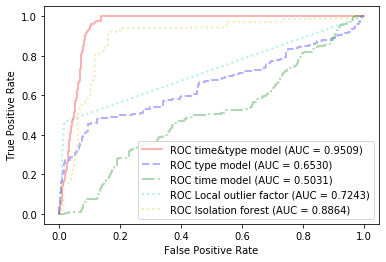

In [688]:
aurocs = eval_AUC(granularity, act_types, empolyeeList, input_path, score_lof, score_iso, testing_act_start_point, _index=None)

##### AUROC categorized by log_file types.

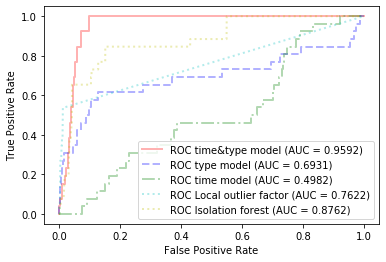

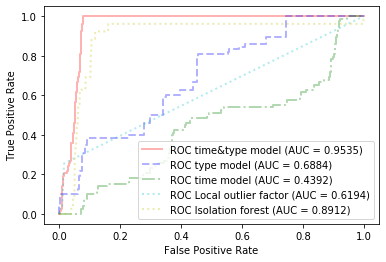

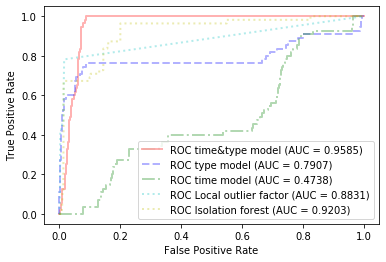

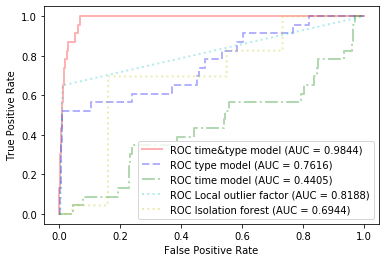

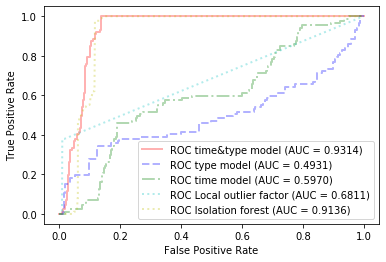

In [689]:
granularity = "log_type"
act_types = [[0,1,2,3,4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15], [16, 18, 19], [20, 21, 22]]
index = ["logon", "device", "file", "http", "email"]
for _act_type in act_types:
    aurocs = eval_AUC(granularity, _act_type, empolyeeList, input_path, score_lof, score_iso, testing_act_start_point, _index=None)

### 3. evaluate the models by malicious score ranking.

In [718]:
def detection_by_score_ranking(score, _label, _act, _tim, score_type, top_percent, detail):
    
    desc_sort_index = np.argsort(score)
    for n in [int(len(_act)*top_percent)]:
        _dec_sort_label = _label[desc_sort_index][0:n]
        count = 0
        for label in _dec_sort_label:
            if label == 1:
                count += 1
        print(score_type, ": ", "top n=%s   " % n, "#_of_insider_activities=%s "%count)        
        
        if detail:     
            _dec_sort_act = _act[desc_sort_index][0:n].tolist()
            _dec_sort_tim = _tim[desc_sort_index][0:n].tolist()
            _dec_sort_score = score[desc_sort_index][0:n].tolist()
            
            print("(")
            for _type in set(_dec_sort_act):
                count = 0
                for act in _dec_sort_act:
                    if _type == act:
                        count += 1
                print("type=%s" % _type, ": ", count)
            print( ")")
            
            print("[")
            for label, _time, _type, _score in zip(_dec_sort_label, _dec_sort_tim, _dec_sort_act, _dec_sort_score):
                if label == 1:
                    print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(_time)), _time, id_2_feature[_type], _score)
            print("]")
            print("\n \n \n")

##### User-specific score ranking

In [719]:
def eval_model_by_score_ranking(usrid, start_piont, input_path, top_percent, base_iso=None, base_lof=None, detail=None):
    
        f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path,usrid))[start_piont:]
        f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path,usrid))[start_piont:]
        scores = np.load("./%s/score/%s_score.npy"%(input_path,usrid))[start_piont:]
        _act = np.load("./%s/activity/%s_act.npy"%(input_path,usrid))[start_piont:]
        _label = np.load("./%s/label/%s_act_label.npy"%(input_path,usrid))[start_piont:]
        _tim = np.load("./dataRepo/repo_eval/time/%s_time.npy"%usrid)[start_piont:]

        _label_ignore_WWW_visit = [1 if _lab == 1 and _activity != 17 else 0 for _activity, _lab in zip(_act, _label)]
        _label_ignore_WWW_visit = np.array(_label_ignore_WWW_visit)

        print("&&& %s: total #_of_activities= %s   total #_of_insider_activities = %s"%(usrid, len(_label), len([_lab for _lab in _label_ignore_WWW_visit if _lab == 1])))
        print("============================================================================================")

        detection_by_score_ranking(f_t, _label_ignore_WWW_visit, _act, _tim, "time",top_percent,detail)
        detection_by_score_ranking(f_y, _label_ignore_WWW_visit, _act, _tim, "type",top_percent,detail)
        detection_by_score_ranking(scores, _label_ignore_WWW_visit, _act, _tim, "time&type *",top_percent,detail)
        detection_by_score_ranking(base_iso, _label_ignore_WWW_visit, _act, _tim, "isolation forest",top_percent,detail)
        detection_by_score_ranking(base_lof, _label_ignore_WWW_visit, _act, _tim, "local outlier factor",top_percent,detail)

##### User-\lambda_0 spcecific

In [130]:
def eval_model_by_score_ranking_2(usrid, start_piont, input_path, _lambda_0, base_iso=None, base_lof=None):
    
        f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path,usrid, _lambda_0))[start_piont:]
        f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path,usrid, _lambda_0))[start_piont:]
        scores = np.load("./%s/score/%s_score_%s.npy"%(input_path,usrid, _lambda_0))[start_piont:]
        _act = np.load("./%s/activity/%s_act.npy"%(input_path,usrid))[start_piont:]
        _label = np.load("./%s/label/%s_act_label.npy"%(input_path,usrid))[start_piont:]
        _tim = np.load("./dataRepo/repo_eval/time/%s_time.npy"%usrid)[start_piont:]

        _label_ignore_WWW_visit = [1 if _lab == 1 and _activity != 17 else 0 for _activity, _lab in zip(_act, _label)]
        _label_ignore_WWW_visit = np.array(_label_ignore_WWW_visit)

        print("&&& %s: total #_of_activities= %s   total #_of_insider_activities = %s"%(usrid, len(_label), len([_lab for _lab in _label if _lab == 1])))
        print("============================================================================================")

        detection_by_score_ranking(f_t, _label_ignore_WWW_visit, _act, _tim, "time")
        detection_by_score_ranking(f_y, _label_ignore_WWW_visit, _act, _tim, "type")
        detection_by_score_ranking(scores, _label_ignore_WWW_visit, _act, _tim, "time&type *")
        detection_by_score_ranking(base_iso, _label_ignore_WWW_visit, _act, _tim, "isolation forest")
        detection_by_score_ranking(base_lof, _label_ignore_WWW_visit, _act, _tim, "local outlier factor")

##### Load and integrate out the scores.

In [73]:
empolyeeList = ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771']
testing_act_start_point = [3137,3775,6198,4243, 2096,4501,1494,3760,461, 461]
testing_act_length = [28233,33979,55791,38195,18868,40514,13449,33842,4149,4150]

iso_scores = defaultdict(list)
lof_scores = defaultdict(list)
for i, usrid in enumerate(empolyeeList):
    if i == 0:
        iso_scores[usrid] = score_iso[:testing_act_length[i]]
        lof_scores[usrid] = score_lof[:testing_act_length[i]]
    else:
        iso_scores[usrid] = score_iso[np.sum(testing_act_length[:i]):np.sum(testing_act_length[:i+1])]
        lof_scores[usrid] = score_lof[np.sum(testing_act_length[:i]):np.sum(testing_act_length[:i+1])]

In [721]:
input_path = "eval_input"
top_percent = 0.1
for usrid, _start_piont in zip(empolyeeList, testing_act_start_point):
    eval_model_by_score_ranking(usrid, _start_piont, input_path, top_percent,iso_scores[usrid], lof_scores[usrid])
    print(" \n ")

&&& ACM2278: total #_of_activities= 28233   total #_of_insider_activities = 22
time :  top n=2823    #_of_insider_activities=0 
type :  top n=2823    #_of_insider_activities=22 
time&type * :  top n=2823    #_of_insider_activities=22 
isolation forest :  top n=2823    #_of_insider_activities=3 
local outlier factor :  top n=2823    #_of_insider_activities=7 
 
 
&&& CDE1846: total #_of_activities= 33979   total #_of_insider_activities = 134
time :  top n=3397    #_of_insider_activities=7 
type :  top n=3397    #_of_insider_activities=74 
time&type * :  top n=3397    #_of_insider_activities=128 
isolation forest :  top n=3397    #_of_insider_activities=125 
local outlier factor :  top n=3397    #_of_insider_activities=83 
 
 
&&& CMP2946: total #_of_activities= 55791   total #_of_insider_activities = 94
time :  top n=5579    #_of_insider_activities=5 
type :  top n=5579    #_of_insider_activities=23 
time&type * :  top n=5579    #_of_insider_activities=40 
isolation forest :  top n=5579

In [722]:
input_path = "eval_input"
top_percent = 0.1
for usrid, _start_piont in zip(empolyeeList, testing_act_start_point):
    eval_model_by_score_ranking(usrid, _start_piont, input_path, top_percent, iso_scores[usrid], lof_scores[usrid], detail=True)
    print(" \n ")

&&& ACM2278: total #_of_activities= 28233   total #_of_insider_activities = 22
time :  top n=2823    #_of_insider_activities=0 
(
type=1 :  41
type=4 :  2
type=15 :  2
type=17 :  2543
type=18 :  3
type=19 :  7
type=21 :  148
type=22 :  77
)
[
]

 
 

type :  top n=2823    #_of_insider_activities=22 
(
type=1 :  125
type=2 :  4
type=3 :  1
type=4 :  74
type=7 :  8
type=8 :  3
type=9 :  11
type=12 :  5
type=13 :  1
type=14 :  11
type=15 :  78
type=17 :  2080
type=18 :  24
type=19 :  72
type=21 :  104
type=22 :  222
)
[
2010-08-19 01:46:04 1282200364.0 File_zip 0.7748023767214106
2010-08-19 01:38:10 1282199890.0 File_txt 0.7811421373585059
2010-08-19 01:34:19 1282199659.0 File_jpg 0.7946731970886692
2010-08-24 03:24:16 1282638256.0 Connect_After 0.8102738567035168
2010-08-24 03:48:51 1282639731.0 File_jpg 0.826916317866252
2010-08-24 03:34:21 1282638861.0 File_txt 0.8300152321707119
2010-08-19 01:37:20 1282199840.0 File_jpg 0.8317830873520561
2010-08-18 21:47:42 1282186062.0 Weekday_Logon

&&& CMP2946: total #_of_activities= 55791   total #_of_insider_activities = 94
time :  top n=5579    #_of_insider_activities=5 
(
type=1 :  86
type=4 :  10
type=6 :  141
type=9 :  129
type=11 :  12
type=12 :  20
type=13 :  9
type=14 :  3
type=15 :  135
type=17 :  4184
type=18 :  365
type=19 :  33
type=21 :  281
type=22 :  171
)
[
2011-02-21 10:51:22 1298307082.0 Email_Out 0.20835518261314415
2011-02-07 12:28:06 1297103286.0 Email_Out 0.23519472413025913
2011-02-07 13:06:28 1297105588.0 WebsiteUpload 0.24473804369081417
2011-03-07 09:28:08 1299511688.0 Connect_Normal 0.2632093488242795
2011-03-07 09:31:43 1299511903.0 Disconnect 0.2641533222937841
]

 
 

type :  top n=5579    #_of_insider_activities=23 
(
type=1 :  134
type=4 :  130
type=6 :  123
type=7 :  3
type=9 :  179
type=11 :  44
type=12 :  132
type=13 :  69
type=14 :  43
type=15 :  203
type=17 :  3152
type=18 :  636
type=19 :  158
type=21 :  234
type=22 :  339
)
[
2011-03-07 16:10:38 1299535838.0 Disconnect 0.9304844458992723
20

### 4. Empirical distribution of the likelihood.

In [723]:
def draw_curve(sus_score, act_type, x_label, bin_num, usrid, int_indicator, y_axis_int=None):
    
    n, bins, patches = plt.hist(sus_score, bin_num, facecolor='g', range=(0.0, 1.0))

    plt.xlabel('%s'%x_label)
    plt.ylabel('Frequency')
    
    if y_axis_int:
        y = np.array(n).astype(int)
        if y_axis_int == 1:
            yint = np.arange(min(y), max(y)+1)
        else:
            yint = np.arange(min(y), max(y)+1, 3)
        plt.yticks(yint)

    plt.show()
    plt.close()

In [724]:
def activity_distribution_analysis(usrid, f_t, f_y, score, label, int_index):

    ins_f_t = f_t[label == 1]
    nor_f_t = f_t[label == 0]


    ins_f_y = f_y[label == 1]
    nor_f_y = f_y[label == 0]


    ins_score = score[label == 1]
    nor_score = score[label == 0]
    

    draw_curve(ins_f_t,"malicious_f_t", "$p^*(t)$",200, usrid, int_index[0])
    draw_curve(nor_f_t,"normal_f_t","$p^*(t)$",200, usrid, int_index[1])

    draw_curve(ins_f_y,"malicious_f_y", "$p^*(y)$", 200, usrid, int_index[2])
    draw_curve(nor_f_y,"normal_f_y", "$p^*(y)$",200, usrid, int_index[3])
    draw_curve(ins_score,"malicious_score", "$p^*(t,y)$",200, usrid, int_index[4], y_axis_int=2)
    draw_curve(nor_score,"normal_score", "$p^*(t,y)$",200, usrid, int_index[5])

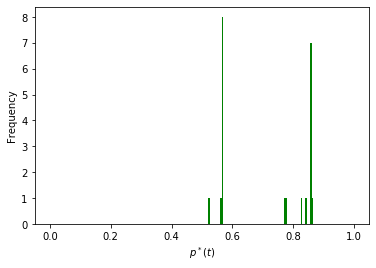

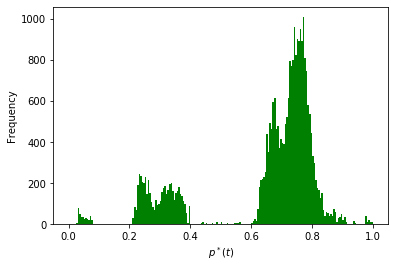

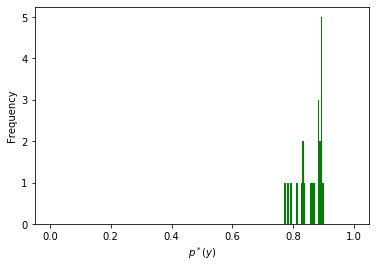

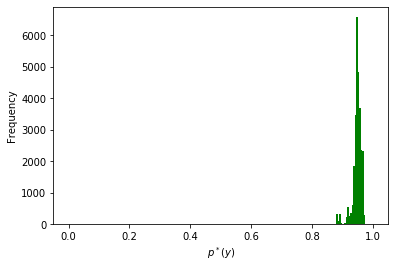

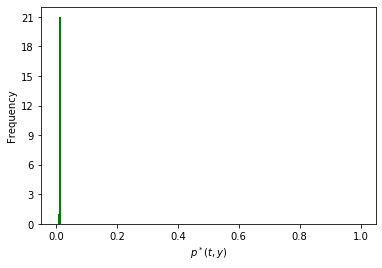

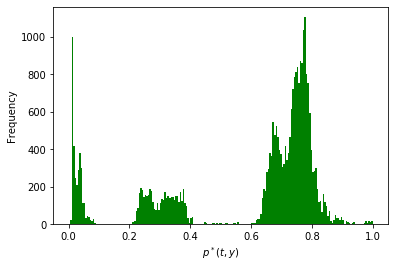

ACM2278


KeyboardInterrupt: 

In [725]:
y_int_index = [1,0,1,0,1,0]
input_path = "eval_input"
start_point = [3137,3775,6198,4243, 2096]
for usr, _start_point in zip(['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771'], start_point):
    f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path, usr))[_start_point:]
    f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path, usr))[_start_point:]
    scores = np.load("./%s/score/%s_score.npy"%(input_path, usr))[_start_point:]
    activities = np.load("./%s/activity/%s_act.npy"%(input_path, usr))[_start_point:]
    labels = np.load("./%s/label/%s_act_label.npy"%(input_path, usr))[_start_point:]

    _label_ignore_WWW_visit = [1 if _lab == 1 and _activity != 17 else 0 for _activity, _lab in zip(activities, labels)]
    _label_ignore_WWW_visit = np.array(_label_ignore_WWW_visit)

    activity_distribution_analysis(usr, f_t, f_y, scores, _label_ignore_WWW_visit, y_int_index)
    print(usr)
    input()